In [3]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def classify_x(x, w):
    return np.sign(np.dot(w,x.T))
    

In [11]:
def run_experiment(n = 10, d=2, min_x=-1, max_x=1):


    def train_pla(x,y):
        i=0
        x_index = np.arange(0,n,1)
        w_i = np.zeros([1, d])

        error_count = 1
        while error_count > 0:
            y_hat_i = classify_x(x, w_i)
            error_index = x_index[(y_hat_i != y)[0]]
            error_count = len(error_index)
            if error_count > 0:

                # sample a point from the misclassified points
                # and update the weight (ie. gradient descent)
                update_i = np.random.choice(error_index)
                w_i = w_i + y[:,update_i]* x[update_i,:]
                i += 1

        return w_i, i
    iterations = []
    prob_of_error = []
    for i in xrange(0,10000):
        x = np.column_stack([
            np.random.uniform(low=min_x, high=max_x, size=(n,d))
            ])
        true_w = np.random.uniform(low=min_x, high=max_x, size=(1,d))
        y = classify_x(x, true_w)
        w_i, j = train_pla(x,y)
        iterations.append(j)
        n_test = n*5
        x_test = np.column_stack([
            np.random.uniform(low=min_x, high=max_x, size=(n_test,d))
            ])
        y_test = classify_x(x_test, true_w)
        y_pred = classify_x(x_test, w_i)
        errs = sum(y_test != y_pred)
        prob_of_error.append(errs/float(n_test))
    return iterations, prob_of_error

4.6687


(array([  9.91200000e+03,   6.50000000e+01,   1.30000000e+01,
          4.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([   1. ,   34.4,   67.8,  101.2,  134.6,  168. ,  201.4,  234.8,
         268.2,  301.6,  335. ]),
 <a list of 10 Patch objects>)

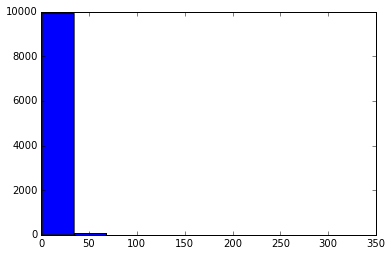

In [14]:
iters, errs = run_experiment(n=10)
print np.mean(iters)
# avg number of iterations to reach convergence
plt.hist(iters)

In [15]:
np.mean(errs)

0.0011631200000000006